In [1]:
# Check for GPU
!nvidia-smi -L


GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU (UUID: GPU-63841278-b94a-af1d-b385-7d84275529fb)


In [2]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   09_SkimLit_nlp_milestone_project_2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	02. Neural Network Classification with TensorFlow.ipynb
	03. Convolutional Neural Networks and Computer Vision with TensorFlow.ipynb
	04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb
	05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb
	"06. Transfer Learning with TensorFlow Part 3 Scaling up (\360\237\215\224\360\237\221\201 Food Vision mini).ipynb"
	06_101_food_class_10_percent_saved_big_dog_model.zip
	06_101_food_class_10_percent_saved_big_dog_model.zip.1
	06_101_food_class_10_percent_saved_big_dog_model/
	07_efficientnetb0_feature_extract_model_mixed_precision.zip
	07_effici

In [3]:
! git clone https://github.com/Semen-B/NLP-Neural-Networks-for-Joint-Sentence-Classification-in-Medical-Paper-Abstracts.git

fatal: destination path 'NLP-Neural-Networks-for-Joint-Sentence-Classification-in-Medical-Paper-Abstracts' already exists and is not an empty directory.


In [4]:
! git add 09_SkimLit_nlp_milestone_project_2.ipynb

The file will have its original line endings in your working directory


In [5]:
! git commit -m "sixth commit"

[master 4fae013] sixth commit
 1 file changed, 1079 insertions(+), 321 deletions(-)


In [6]:
! git remote add origin https://github.com/Semen-B/NLP_Medical_Paper_Abstracts.git

error: remote origin already exists.


In [7]:
! git branch -M master

In [8]:
! git branch

* master
  tmp


In [9]:
! git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.

To https://github.com/Semen-B/NLP_Medical_Paper_Abstracts.git


   d8a5458..4fae013  master -> master


In [10]:
! git reset

In [11]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [12]:
!dir pubmed-rct

 Volume in drive C has no label.
 Volume Serial Number is AA66-8B4D

 Directory of C:\Users\semen\Desktop\pythonProject\pubmed-rct

01.05.2022  17:05    <DIR>          .
01.05.2022  17:05    <DIR>          ..
01.05.2022  17:14    <DIR>          PubMed_200k_RCT
01.05.2022  17:16    <DIR>          PubMed_200k_RCT_numbers_replaced_with_at_sign
01.05.2022  17:05    <DIR>          PubMed_20k_RCT
01.05.2022  17:05    <DIR>          PubMed_20k_RCT_numbers_replaced_with_at_sign
01.05.2022  17:05             2ÿ403 README.md
               1 File(s)          2ÿ403 bytes
               6 Dir(s)  312ÿ376ÿ315ÿ904 bytes free


In [13]:
# Check what files are in the PubMed_20K dataset 
!dir pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign

 Volume in drive C has no label.
 Volume Serial Number is AA66-8B4D

 Directory of C:\Users\semen\Desktop\pythonProject\pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign

01.05.2022  17:05    <DIR>          .
01.05.2022  17:05    <DIR>          ..
01.05.2022  17:05         4ÿ880ÿ409 dev.txt
01.05.2022  17:05         4ÿ846ÿ504 test.txt
01.05.2022  17:05        29ÿ118ÿ832 train.txt
               3 File(s)     38ÿ845ÿ745 bytes
               2 Dir(s)  312ÿ376ÿ315ÿ904 bytes free


In [14]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [15]:
def create_list_of_dic(filename):
    my_list_dic=[]
    my_list = str(get_lines(filename))
    sample = my_list.split('###')
    for f in range(len(sample)):
        count = 0
        separator = "\\n"
        semple_1 = sample[f].split(separator)
        total_lines = len(semple_1)-4
        for i in semple_1[1:-2]:
            temp_dic = {}
            _key, value, *other = i.split('\\t')
            temp_dic['target'] = ''.join(char for char in _key if char.isalnum())
            temp_dic['text'] = value.lower()
            temp_dic['line_number'] = count
            temp_dic['total_lines'] = total_lines
            my_list_dic.append(temp_dic)
            count+=1
    return my_list_dic

In [16]:
my_dic = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
my_dic[:50]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [17]:
len(my_dic)

180040

In [18]:
! git add 09_SkimLit_nlp_milestone_project_2.ipynb

In [19]:
!git commit -m "new commit accuracy"

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	02. Neural Network Classification with TensorFlow.ipynb
	03. Convolutional Neural Networks and Computer Vision with TensorFlow.ipynb
	04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb
	05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb
	"06. Transfer Learning with TensorFlow Part 3 Scaling up (\360\237\215\224\360\237\221\201 Food Vision mini).ipynb"
	06_101_food_class_10_percent_saved_big_dog_model.zip
	06_101_food_class_10_percent_saved_big_dog_model.zip.1
	06_101_food_class_10_percent_saved_big_dog_model/
	07_efficientnetb0_feature_extract_model_mixed_precision.zip
	07_efficientnetb0_feature_extract_model_mixed_precision/
	07_food_vision_milestone_project_1.ipynb
	08_introduction_to_nlp_in_tensorflow.ipynb
	101_classes_10_percent_data_model_checkpoint.data-00000-of-00001
	101_classes_10_per

In [20]:
def preprocess_text_with_line_numbers(filename):
    """Returns a list of dictionaries of abstract line data.

    Takes in filename, reads its contents and sorts through each line,
    extracting things like the target label, the text of the sentence,
    how many sentences are in the current abstract and what sentence number
    the target line is.

    Args:
      filename: a string of the target text file to read and extract line data
      from.

    Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
    """
    input_lines = get_lines(filename) # get all lines from filename
    abstract_lines = "" # create an empty abstract
    abstract_samples = [] # create an empty list of abstracts

    # Loop through each line in target file
    for line in input_lines:
        if line.startswith("###"): # check to see if line is an ID line
            abstract_id = line
            abstract_lines = "" # reset abstract string
        elif line.isspace(): # check to see if line is a new line
            abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

            # Iterate through each line in abstract and count them at the same time
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {} # create empty dict to store data from line
                target_text_split = abstract_line.split("\t") # split target label from text
                line_data["target"] = target_text_split[0] # get target label
                line_data["text"] = target_text_split[1].lower() # get target text and lower it
                line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
                line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
                abstract_samples.append(line_data) # add line data to abstract samples list

        else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
            abstract_lines += line

    return abstract_samples

In [21]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
train_samples = preprocess_text_with_line_numbers('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")


In [22]:
# Check the first abstract of our training data
train_samples[:100]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [23]:
len(train_samples)

180040

In [24]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [25]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

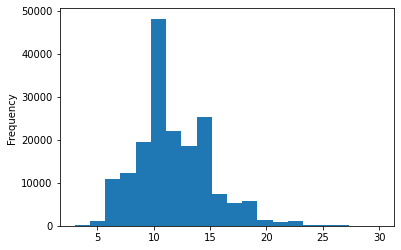

In [26]:
train_df.total_lines.plot(kind ="hist", bins=20)

In [27]:
train_samples = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
val_samples = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')
test_samples = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')

In [28]:
import tensorflow as tf

In [60]:
#One hot encode lables
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labesl_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labesl_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(val_df["target"].to_numpy(), axis=-1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1, 1))
train_labesl_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [31]:
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [32]:
train_df 

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [54]:
list(train_df[''])

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [33]:
from numpy import mean

In [34]:
list_of_num = []
for index in train_df.index:
    list_of_num.append(train_df['text'][index].count(' '))
    
avg = mean(list_of_num)
list_of_num, avg


([48,
  26,
  14,
  13,
  34,
  28,
  29,
  54,
  35,
  7,
  31,
  38,
  11,
  25,
  32,
  39,
  21,
  22,
  26,
  25,
  26,
  33,
  40,
  17,
  8,
  22,
  58,
  15,
  17,
  21,
  16,
  50,
  7,
  16,
  15,
  4,
  20,
  3,
  41,
  49,
  10,
  18,
  19,
  28,
  35,
  43,
  38,
  24,
  18,
  23,
  18,
  13,
  10,
  17,
  15,
  25,
  15,
  17,
  37,
  27,
  20,
  17,
  21,
  8,
  36,
  5,
  31,
  20,
  25,
  24,
  17,
  20,
  19,
  11,
  25,
  15,
  22,
  18,
  15,
  38,
  18,
  13,
  36,
  33,
  14,
  46,
  25,
  86,
  16,
  28,
  30,
  12,
  36,
  27,
  34,
  59,
  63,
  65,
  7,
  11,
  16,
  39,
  42,
  36,
  46,
  5,
  39,
  63,
  19,
  31,
  52,
  15,
  29,
  53,
  50,
  18,
  27,
  31,
  35,
  39,
  12,
  24,
  29,
  22,
  16,
  14,
  19,
  49,
  11,
  15,
  26,
  23,
  9,
  23,
  4,
  13,
  18,
  31,
  12,
  20,
  22,
  9,
  10,
  16,
  11,
  20,
  20,
  14,
  16,
  20,
  17,
  39,
  32,
  20,
  40,
  20,
  12,
  28,
  27,
  12,
  43,
  19,
  30,
  7,
  28,
  12,
  115,
  26,
  25

<AxesSubplot:ylabel='Frequency'>

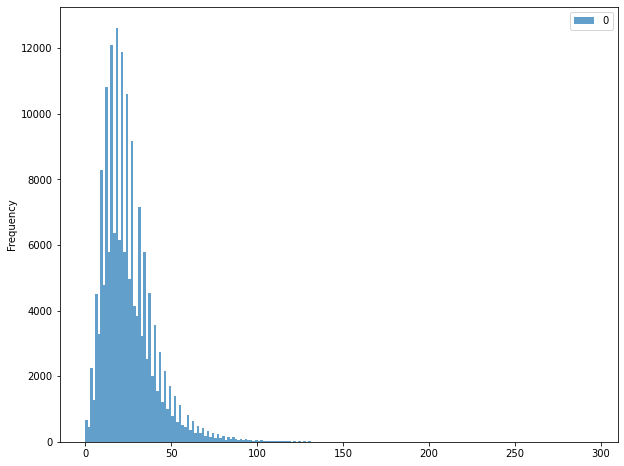

In [35]:
df_hist = pd.DataFrame(list_of_num)
df_hist.plot.hist(bins=200, alpha=0.7, figsize=(10, 8))

In [42]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Setup text vectorization with custom variables
max_vocab_length = 86000 # max number of words to have in our vocabulary
max_length = 60 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [43]:
text_vectorizer.adapt(train_df['text'])

In [44]:
text_vectorizer(train_df['text'][10000])

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([  299,    20,   784,  2628,    18,   457, 39644,     5,    71,
           4,  1046,   265,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int64)>

In [45]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 64841
Top 5 most common words: ['', '[UNK]', 'the', 'and', 'of']
Bottom 5 least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [46]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             mask_zero=True,
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

In [47]:
sample_embed = embedding(text_vectorizer(train_df['text'][10000]))
sample_embed[0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03748605, -0.00021989, -0.04359752,  0.02412561, -0.00687733,
       -0.00643288,  0.04683146, -0.03231154,  0.01906149,  0.00058554,
       -0.03832903, -0.03910276, -0.04623865, -0.04948337,  0.01483753,
        0.03817955, -0.04513848, -0.03937522, -0.01187236, -0.00577147,
        0.03582468, -0.0335082 , -0.02434157,  0.0161026 ,  0.03354938,
       -0.03796289,  0.0343806 , -0.02395328, -0.01672857,  0.02602958,
        0.02377399,  0.03455451, -0.01289757, -0.03740299,  0.01408248,
        0.01645428, -0.02191278,  0.02893208, -0.03673612, -0.03886055,
       -0.02875739,  0.008676  , -0.03322427,  0.00662416,  0.00385163,
       -0.03722645, -0.00656782,  0.03742001,  0.03201741, -0.02266761,
        0.01882419,  0.00304293, -0.04187814,  0.01398506, -0.02172558,
        0.02978731, -0.00608387, -0.03582561, -0.01819932,  0.02611626,
       -0.03005253, -0.04457638, -0.03126935,  0.04606754,  0.0299225 ,
       -0.003426

In [48]:
import tensorflow as tf
from tensorflow.keras import layers

In [51]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_conv')

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_1.summary()

Model: "model_1_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 60)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 60, 128)           11008000  
                                                                 
 conv1d_2 (Conv1D)           (None, 58, 32)            12320     
                                                                 
 global_average_pooling1d_2   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                

In [55]:
# Fit the model
model_1_history = model_1.fit(train_df['text'],
                              train_labesl_one_hot,
                              epochs=5,
                              validation_data=(val_df['text'], val_labesl_one_hot))

Epoch 1/5
5627/5627 [==============================] - 61s 9ms/step - loss: 0.6506 - accuracy: 0.7593 - val_loss: 0.5513 - val_accuracy: 0.8051
Epoch 2/5
5627/5627 [==============================] - 51s 9ms/step - loss: 0.4725 - accuracy: 0.8342 - val_loss: 0.5328 - val_accuracy: 0.8093
Epoch 3/5
5627/5627 [==============================] - 50s 9ms/step - loss: 0.3914 - accuracy: 0.8656 - val_loss: 0.5510 - val_accuracy: 0.8085
Epoch 4/5
5627/5627 [==============================] - 50s 9ms/step - loss: 0.3328 - accuracy: 0.8870 - val_loss: 0.5820 - val_accuracy: 0.8056
Epoch 5/5
5627/5627 [==============================] - 50s 9ms/step - loss: 0.2860 - accuracy: 0.9042 - val_loss: 0.6229 - val_accuracy: 0.7959


In [61]:
model_1.evaluate(test_df['text'], test_labels_one_hot)

942/942 [==============================] - 3s 3ms/step - loss: 0.6468 - accuracy: 0.7874


[0.6467951536178589, 0.7873569130897522]